In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from joblib import dump

from dataprep import data_constructor
from dataprep import data_split_encode

In [2]:
df = pd.read_csv("../data/salary_cleaned.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0
4,52.0,Male,Master's Degree,Director,20.0,200000.0


In [3]:
scaler = StandardScaler()
encoder = OneHotEncoder(categories="auto", drop="first", handle_unknown="ignore")

In [4]:
X_train, X_test, y_train, y_test = data_constructor(
    data=df,
    label="Salary",
    test_size=0.30,
    seed=42,
    scaler=scaler,
    encoder=encoder,
    scaler_path="../models/scaler_fitted.joblib",
    encoder_path="../models/encoder_fitted.joblib"
)

Enocder has been saved to path: ..\models\encoder_fitted.joblib
Scaler has been saved to path: ..\models\scaler_fitted.joblib


In [5]:
X_train.head()

,Age,Years of Experience,Gender_Male,Gender_Other,Education Level_High School,Education Level_Master's Degree,Education Level_PhD,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Back end Developer,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
1494,-0.995424,-1.187835,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,-0.633275,-0.612951,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1251,-1.116140,-1.044114,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
733,2.022483,2.692630,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
609,-0.633275,-0.612951,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X_test.head()

,Age,Years of Experience,Gender_Male,Gender_Other,Education Level_High School,Education Level_Master's Degree,Education Level_PhD,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Back end Developer,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
1192,-0.753992,-1.187835,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,-0.753992,-0.325509,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1473,-1.478289,-1.331556,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
765,-0.753992,-0.756672,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
485,-1.357573,-1.187835,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y_train

1494     55000.0
997     102828.0
1251     40000.0
733     186963.0
609     105000.0
          ...   
1130     65000.0
1294     47000.0
860     136285.0
1459     50000.0
1126     70000.0
Name: Salary, Length: 1244, dtype: float64

In [8]:
y_test

1192     30000.0
426     180000.0
1473     25000.0
765     104702.0
485      60000.0
          ...   
81       80000.0
584     120000.0
380     180000.0
1504     50000.0
84       40000.0
Name: Salary, Length: 534, dtype: float64

### Training various algorithms in base condition to get the r2score

#### Training linear regression model

In [9]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
preds_linear = model_linear.predict(X_test)
r2_linear = r2_score(y_true=y_test, y_pred=preds_linear)
print(f"R2 score of linear regression model: {r2_linear}")

R2 score of linear regression model: 0.8387140099620773


#### Training kNeighborsRegressor model

In [10]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
r2_knn = r2_score(y_true=y_test, y_pred=knn_preds)
r2_knn

0.8604489641332803

Training SupposeVectorRegressor model

In [11]:
svr = SVR() # base model
svr.fit(X_train, y_train)
svr_preds = svr.predict(X_test)
r2_svr = r2_score(y_true=y_test, y_pred=svr_preds)
r2_svr

0.0020840675598708946

#### Training RandomForestRegressor model

In [12]:
rforest = RandomForestRegressor()
rforest.fit(X_train, y_train)
preds_rforest = rforest.predict(X_test)
r2_rforest = r2_score(y_true=y_test, y_pred=preds_rforest)
print(r2_rforest)

0.9123432193161538


**Conclusion:**  
The linear regression model is not fitting at all. Maybe it doesn't need standardization. Maybe it the numeric feature columns' units are not that far away from each other.

In [13]:
df2 = pd.read_csv("../data/salary_cleaned.csv")
df2.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0
4,52.0,Male,Master's Degree,Director,20.0,200000.0


In [14]:
encoder = OneHotEncoder(categories="auto", drop="first", handle_unknown="ignore")

In [15]:
X_train, X_test, y_train, y_test = data_split_encode(
    data=df2,
    label="Salary",
    test_size=0.30,
    seed=42,
    encoder=encoder,
    encoder_path="../models/encoder_fitted.joblib"
)

Encode is saved to path: ..\models\encoder_fitted.joblib


#### Let's train the linear regression model on it and get the r2score

In [16]:
model_lin = LinearRegression()
model_lin.fit(X_train, y_train)
pred_lin = model_lin.predict(X_test)
r2_lin = r2_score(y_true=y_test, y_pred=pred_lin)
print(f"R2 score of linear regression model: {r2_lin}")

R2 score of linear regression model: 0.8387140099620778


**Conclusion:**  
Linear regression doesn't seem to fit this data at all. I don't know the implementation of RandomForestRegressor yet. So let's implement knn regressor.

In [17]:
df = pd.read_csv("../data/salary_cleaned.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0
4,52.0,Male,Master's Degree,Director,20.0,200000.0


In [18]:
scaler = StandardScaler()
encoder = OneHotEncoder(categories="auto", drop="first", handle_unknown="ignore")

In [19]:
X_train, X_test, y_train, y_test = data_constructor(
    data=df,
    label="Salary",
    test_size=0.30,
    seed=42,
    scaler=scaler,
    encoder=encoder,
    scaler_path="../models/scaler_fitted.joblib",
    encoder_path="../models/encoder_fitted.joblib"
)

Enocder has been saved to path: ..\models\encoder_fitted.joblib
Scaler has been saved to path: ..\models\scaler_fitted.joblib


#### Setting up the GridSearch and training the model

In [20]:
knn_reg = KNeighborsRegressor()
knn_params = {
    "n_neighbors":[5, 7, 9, 11],
    "weights":["uniform", "distance"],
    "algorithm":["auto"],
    "metric":["minkowski", "euclidean", "manhattan"],
}

knn_tuned = GridSearchCV(
    estimator=knn_reg,
    param_grid=knn_params,
    scoring="neg_mean_absolute_error",
    n_jobs=4, verbose=1, cv=5
)

In [21]:
# Fitting the model
knn_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=4,
             param_grid={'algorithm': ['auto'],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error', verbose=1)

In [22]:
knn_tuned.best_params_ # best combination of hyper params

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 5,
 'weights': 'distance'}

In [23]:
knn_tuned_preds = knn_tuned.predict(X_test)

In [24]:
knn_mae = mean_absolute_error(y_true=y_test, y_pred=knn_tuned_preds)
knn_rmse = root_mean_squared_error(y_true=y_test, y_pred=knn_tuned_preds)

print(f"Mean absolute error of knn regressor: {knn_mae}")
print(f"Root meean squared error of knn regressor: {knn_rmse}")

Mean absolute error of knn regressor: 11140.764282238744
Root meean squared error of knn regressor: 17647.460351285477


#### Saving this knn regressor model

In [25]:
dump(value=knn_tuned, filename="../models/knnreg.joblib")
print(f"Model has been saved!")

Model has been saved!


### Continuing with the practice:
Now I know the implementation of decision tree. Let's try it for regression task.

In [26]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from joblib import dump

from dataprep import data_constructor
from dataprep import data_split_encode



In [27]:
df = pd.read_csv("../data/salary_cleaned.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0
4,52.0,Male,Master's Degree,Director,20.0,200000.0


In [28]:
scaler = StandardScaler()
encoder = OneHotEncoder(categories="auto", handle_unknown="ignore", drop="first")
X_train, X_test, y_train, y_test = data_split_encode(
    # No scaling here
    # No scaling needed for tree methods
    data=df,
    label="Salary",
    test_size=0.33,
    seed=42,
    encoder=encoder,
    encoder_path="../models/encoder_fitted.joblib"
)

Encode is saved to path: ..\models\encoder_fitted.joblib


In [29]:
# Trying a base model of decision tree classifier first
base_tree = DecisionTreeRegressor()
base_tree.fit(X_train, y_train)
base_preds = base_tree.predict(X_test)

In [30]:
base_tree_r2 = r2_score(y_true=y_test, y_pred=base_preds)
base_tree_r2

0.8617296465764069

In [31]:
base_tree_mae = mean_absolute_error(
    y_true=y_test, y_pred=base_preds
)

base_tree_mae
# Base regressor is also giving approx 11k mae

11455.64395229983

In [40]:
# Let's try grid search cv now
dtbase = DecisionTreeRegressor()
dt_params = {
    "criterion":["squared_error", # variance reduction
                 "absolute_error", # uses mae
                 "friedman_mse"], # use mse
    "splitter":["best", "random"],
    "max_depth":[2, 3, 5, 6],
    "max_leaf_nodes":[3, 5, 7],
    # When we apply grid search that means we are using preprunning here
}

dt_tuned = GridSearchCV(
    estimator=dtbase,
    cv=10,
    n_jobs=4,
    param_grid=dt_params,
    scoring="neg_mean_absolute_error"
)

dt_tuned.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=4,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse'],
                         'max_depth': [2, 3, 5, 6], 'max_leaf_nodes': [3, 5, 7],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error')

In [41]:
dt_tuned.best_params_

{'criterion': 'absolute_error',
 'max_depth': 3,
 'max_leaf_nodes': 7,
 'splitter': 'best'}

In [42]:
# Let's evaluate the model
dt_preds = dt_tuned.predict(X_test)
dt_mae = mean_absolute_error(y_true=y_test, y_pred=dt_preds)
dt_rmse = root_mean_squared_error(y_true=y_test, y_pred=dt_preds)
print(f"Mean absolute error: {dt_mae}")
print(f"Root mean squared error: {dt_rmse}")

Mean absolute error: 18920.523850085177
Root mean squared error: 26128.481811124406


The tuned model is performing worse. The base model was better. So simpler model will work better here. These models, with multiple hyper params is picking up more noise. Also decision tree are prone to overfit.

In [43]:
# Let's train a base model and again visualize the tree
base_tree = DecisionTreeRegressor()
base_tree.fit(X_train, y_train)
base_preds = base_tree.predict(X_test)
base_mae = mean_absolute_error(y_true=y_test, y_pred=base_preds)
base_rmse = root_mean_squared_error(y_true=y_test, y_pred=base_preds)

base_mae, base_rmse

(11816.997728563318, 19650.4376957315)

In [46]:
base_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [49]:
# Let's try some pruning
base_tree2 = DecisionTreeRegressor(max_depth=9)
base_tree2.fit(X_train, y_train)
base_preds2 = base_tree2.predict(X_test)
base_mae2 = mean_absolute_error(y_true=y_test, y_pred=base_preds2)
base_rmse2 = root_mean_squared_error(y_true=y_test, y_pred=base_preds2)

base_mae2, base_rmse2

(13148.557071028341, 20192.142219284124)

In [50]:
# max depth 15
base_tree2 = DecisionTreeRegressor(max_depth=15)
base_tree2.fit(X_train, y_train)
base_preds2 = base_tree2.predict(X_test)
base_mae2 = mean_absolute_error(y_true=y_test, y_pred=base_preds2)
base_rmse2 = root_mean_squared_error(y_true=y_test, y_pred=base_preds2)

base_mae2, base_rmse2

(11923.87422305774, 19595.820425204776)

In [54]:
# max depth 20
base_tree2 = DecisionTreeRegressor(max_depth=20)
base_tree2.fit(X_train, y_train)
base_preds2 = base_tree2.predict(X_test)
base_mae2 = mean_absolute_error(y_true=y_test, y_pred=base_preds2)
base_rmse2 = root_mean_squared_error(y_true=y_test, y_pred=base_preds2)

base_mae2, base_rmse2

(11967.008777499237, 20109.31070437776)

**Conclusion:** It's not going any down. It's the best performance it can give. Further I'll try random forest and boosting methods.

### Training the random forest regressor model:
Let's train the model and let's also visualize that how well this model fits to the data:

In [20]:
# Continue

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV

In [4]:
# Tree methods don't require any scalling
df = pd.read_csv("../data/salary_cleaned.csv")

In [5]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0
4,52.0,Male,Master's Degree,Director,20.0,200000.0


<Axes: xlabel='Years of Experience', ylabel='Salary'>

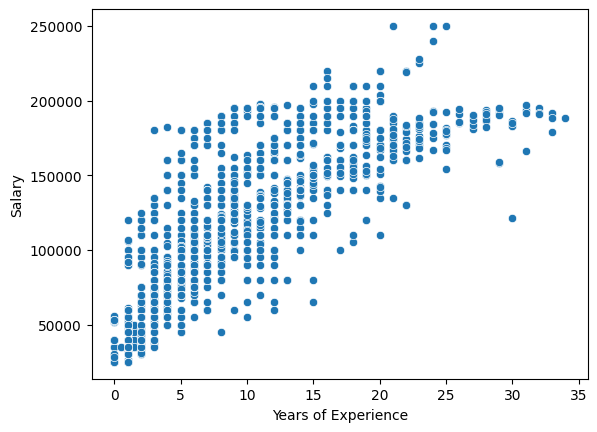

In [7]:
sns.scatterplot(data=df, y="Salary", x="Years of Experience")

<Axes: xlabel='Years of Experience', ylabel='Salary'>

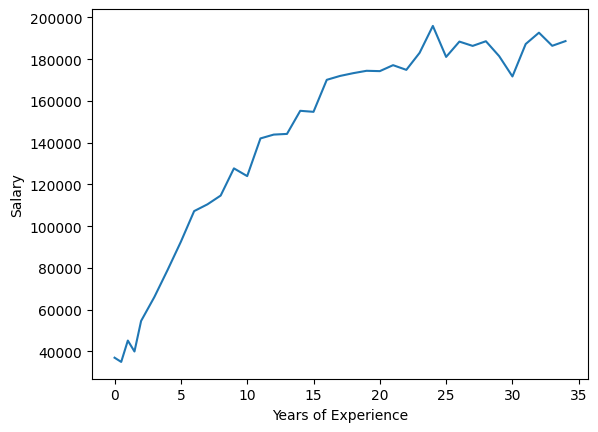

In [9]:
sns.lineplot(data=df, y="Salary", x="Years of Experience", errorbar=None)

In [10]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0
4,52.0,Male,Master's Degree,Director,20.0,200000.0


In [12]:
df_encoded = pd.get_dummies(data=df, dtype=int, drop_first=True)
df_encoded.head()

,Age,Years of Experience,Salary,Gender_Male,Gender_Other,Education Level_High School,Education Level_Master's Degree,Education Level_PhD,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Back end Developer,Job Title_Business Analyst,Job Title_Business Development Manager,Job Title_Business Intelligence Analyst,Job Title_CEO,Job Title_Chief Data Officer,Job Title_Chief Technology Officer,Job Title_Content Marketing Manager,Job Title_Copywriter,Job Title_Creative Director,Job Title_Customer Service Manager,Job Title_Customer Service Rep,Job Title_Customer Service Representative,Job Title_Customer Success Manager,Job Title_Customer Success Rep,Job Title_Data Analyst,Job Title_Data Entry Clerk,Job Title_Data Scientist,Job Title_Delivery Driver,Job Title_Digital Content Producer,Job Title_Digital Marketing Manager,Job Title_Digital Marketing Specialist,Job Title_Director,Job Title_Director of Business Development,Job Title_Director of Data Science,Job Title_Director of Engineering,Job Title_Director of Finance,Job Title_Director of HR,Job Title_Director of Human Capital,Job Title_Director of Human Resources,...,Job Title_Senior Operations Coordinator,Job Title_Senior Operations Manager,Job Title_Senior Product Designer,Job Title_Senior Product Development Manager,Job Title_Senior Product Manager,Job Title_Senior Product Marketing Manager,Job Title_Senior Project Coordinator,Job Title_Senior Project Engineer,Job Title_Senior Project Manager,Job Title_Senior Quality Assurance Analyst,Job Title_Senior Research Scientist,Job Title_Senior Researcher,Job Title_Senior Sales Manager,Job Title_Senior Sales Representative,Job Title_Senior Scientist,Job Title_Senior Software Architect,Job Title_Senior Software Developer,Job Title_Senior Software Engineer,Job Title_Senior Training Specialist,Job Title_Senior UX Designer,Job Title_Social Media Man,Job Title_Social Media Manager,Job Title_Social Media Specialist,Job Title_Software Developer,Job Title_Software Engineer,Job Title_Software Engineer Manager,Job Title_Software Manager,Job Title_Software Project Manager,Job Title_Strategy Consultant,Job Title_Supply Chain Analyst,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32.0,5.0,90000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,28.0,3.0,65000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,45.0,15.0,150000.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,36.0,7.0,60000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,52.0,20.0,200000.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
len(df_encoded.columns)

198

In [14]:
# Select features and label
y = df_encoded["Salary"]
X = df_encoded.drop("Salary", axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101) 
# And let's use 20 percent for testing

In [ ]:
rfr_base = RandomForestRegressor()
rfr_params = {
    "n_estimators":[20, 50, 100, 150, 200],
    "criterion":["squared_error", "absolute_error"],
    "max_depth":[5, 7, 9, 11, 15],
    "bootstrap":[True],
    "oob_score":[True],
    "random_state":[101],
    "max_features":["sqrt", "log2"]
}

rfr = GridSearchCV(
    estimator=rfr_base,
    param_grid=rfr_params,
    cv=5,
    n_jobs=5,
    verbose=2
)

In [22]:
rfr.fit(X_train, y_train)

KeyboardInterrupt: 